# Performance Analysis

This notebook will analyze the performances of each of the models I tried.
Note, for sequence models, I will be using the embedding version since those 
typically perform better and embeddings are what you typically use.

In [40]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [41]:
# Getting the performances
# In the future, want to use something like MLFlow to compare performances easily
valid_bow_models = pd.read_csv('model-performances/validation-bag-of-words.csv')
valid_sequence_models = pd.read_csv('model-performances/validation-sequence-embedding.csv')
valid_general_attention = pd.read_csv('model-performances/validation-attention.csv')
valid_self_attention = pd.read_csv('model-performances/validation-self-attention.csv')
valid_transformers = pd.read_csv('model-performances/validation-transformer.csv')
valid_bert = pd.read_csv('model-performances/validation-BERT.csv')

# Concatinating them all 
validation = pd.concat([valid_bow_models,valid_sequence_models,valid_general_attention,valid_self_attention,valid_transformers,valid_bert])
validation.reset_index(inplace=True,drop=True)
validation

,Name,F1,Precision,Recall,Accuracy
0,Keyword,0.686627,0.718163,0.657744,0.742200
1,Logistic Regression,0.759690,0.770138,0.749522,0.796388
2,Decision Tree,0.693994,0.692015,0.695985,0.736453
3,Random Forests,0.728335,0.742063,0.715105,0.770936
4,AdaBoost,0.698819,0.720081,0.678776,0.748768
5,Gradient Boosting,0.763600,0.790984,0.738050,0.803777
6,Artificial Neural Network,0.699809,0.699809,0.699809,0.742200
7,Recurrent Neural Network,0.664700,0.684211,0.646272,0.720033
8,Gated Recurrent Unit,0.749507,0.773931,0.726577,0.791461
9,Long-Short Term Memory,0.737288,0.826603,0.665392,0.796388


In [42]:
# Getting the training performances
train_bow_models = pd.read_csv('model-performances/training-bag-of-words.csv')
train_sequence_models = pd.read_csv('model-performances/training-sequence-embedding.csv')
train_general_attention = pd.read_csv('model-performances/training-attention.csv')
train_self_attention = pd.read_csv('model-performances/training-self-attention.csv')
train_transformers = pd.read_csv('model-performances/training-transformer.csv')
train_bert = pd.read_csv('model-performances/training-BERT.csv')

# Concatinating them all 
training = pd.concat([train_bow_models,train_sequence_models,train_general_attention,train_self_attention,train_transformers,train_bert])
training.reset_index(inplace=True,drop=True)
training

,Name,F1,Precision,Recall,Accuracy
0,Keyword,0.690321,0.712948,0.669087,0.742036
1,Logistic Regression,0.827381,0.860504,0.796714,0.857143
2,Decision Tree,0.962716,0.989512,0.937333,0.968801
3,Random Forests,0.963078,0.979834,0.946886,0.968801
4,AdaBoost,0.962847,0.985983,0.940772,0.968801
5,Gradient Boosting,0.903434,0.958423,0.854413,0.921511
6,Artificial Neural Network,0.963490,0.969076,0.957967,0.968801
7,Recurrent Neural Network,0.883537,0.913842,0.855178,0.903120
8,Gated Recurrent Unit,0.885259,0.937233,0.838747,0.906568
9,Long-Short Term Memory,0.824261,0.938507,0.734811,0.865353


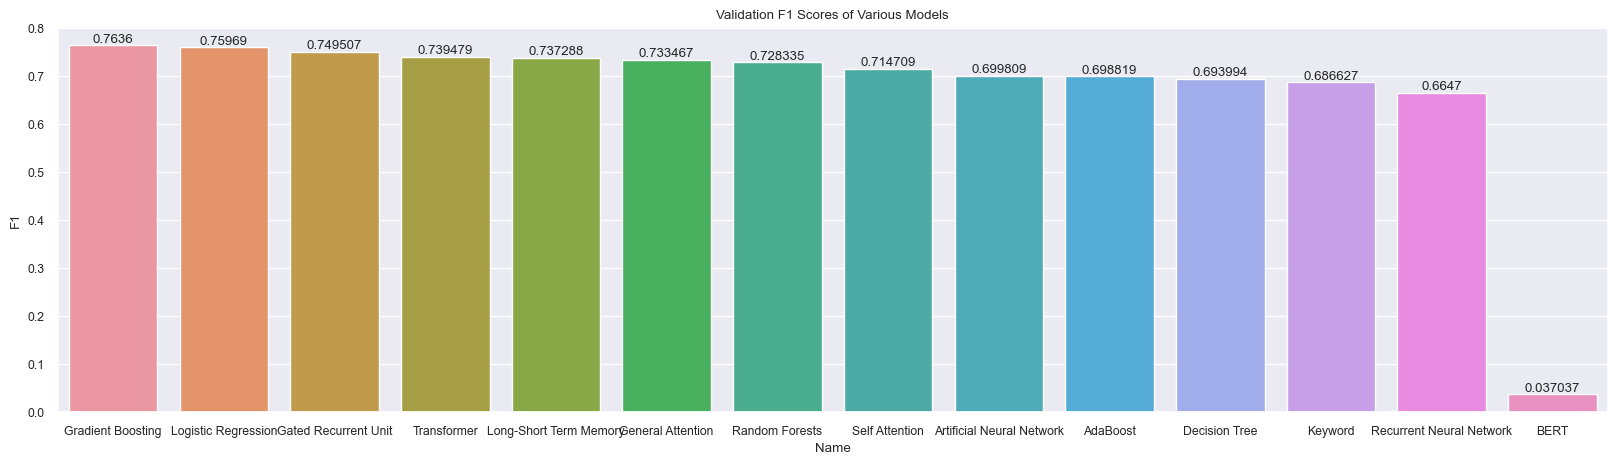

In [43]:
# Making a plot for the validation F1
plt.figure(figsize=(20,5))
sns.set(font_scale=0.8)
plt.xlabel('Models')
plt.ylabel('F1')
plt.title('Validation F1 Scores of Various Models')
ax = sns.barplot(validation.sort_values(by='F1',axis=0,ascending=False),x='Name',y='F1')
ax.bar_label(ax.containers[0])
plt.savefig('performance-visuals/validation_performance.png',bbox_inches='tight')
plt.show()

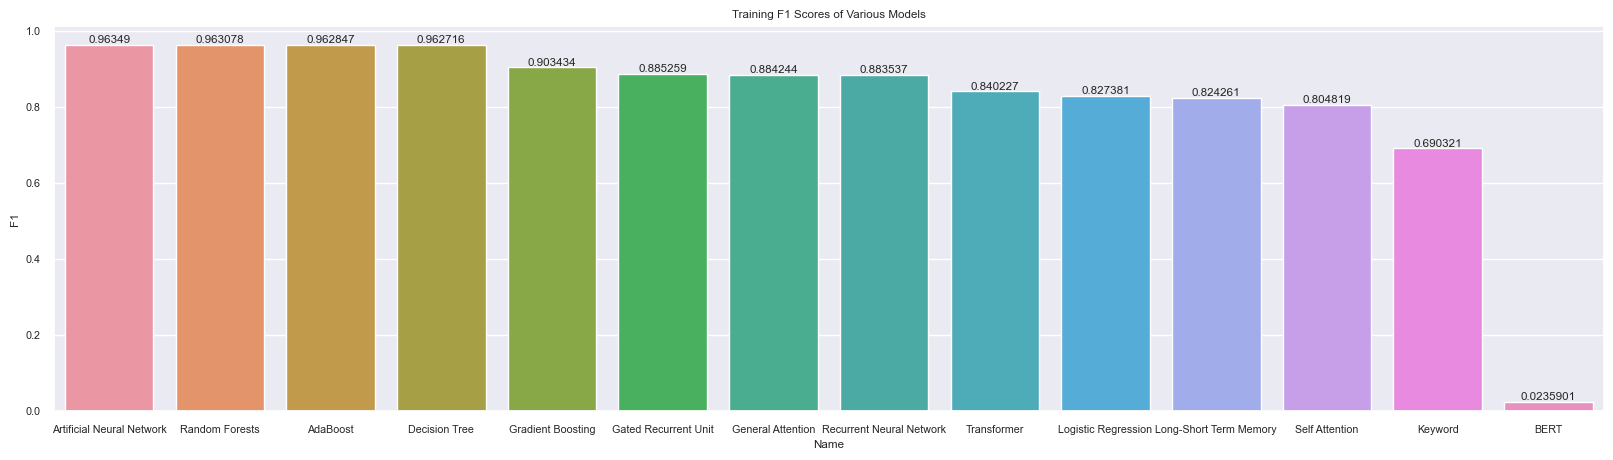

In [46]:
# Making a plot for the Training F1
plt.figure(figsize=(20,5))
sns.set(font_scale=0.7)
plt.xlabel('Models')
plt.ylabel('F1')
plt.title('Training F1 Scores of Various Models')
ax = sns.barplot(training.sort_values(by='F1',axis=0,ascending=False),x='Name',y='F1')
ax.bar_label(ax.containers[0])
plt.savefig('performance-visuals/training_performance.png',bbox_inches='tight')
plt.show()

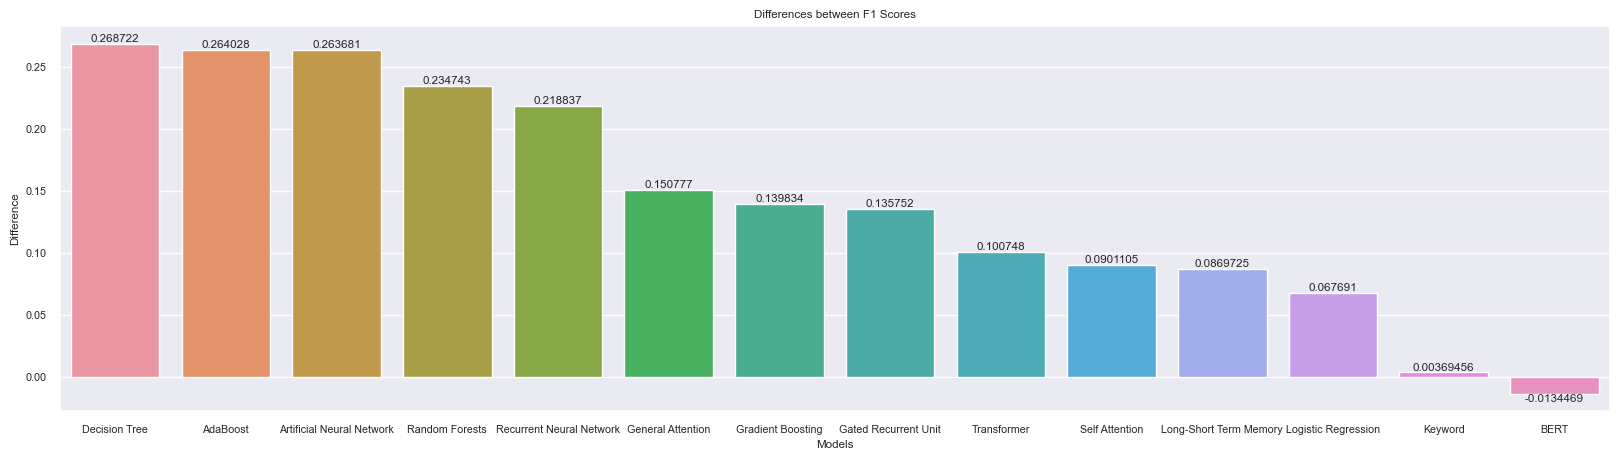

In [45]:
# Getting the differences to see signs of overfitting/underfitting
diff = pd.DataFrame()
diff['Difference'] = training['F1'] - validation['F1']
diff['Models'] = training['Name']

# Plotting a figure
plt.figure(figsize=(20,5))
sns.set(font_scale=0.7)
plt.xlabel('Models')
plt.ylabel('F1')
plt.title('Differences between F1 Scores')
ax = sns.barplot(diff.sort_values(by='Difference',axis=0,ascending=False),x='Models',y='Difference')
ax.bar_label(ax.containers[0])
plt.savefig('performance-visuals/differenceF1.png',bbox_inches='tight')
plt.show()